<a href="https://colab.research.google.com/github/lourencocavalcante/Introduction-to-Data-Science/blob/main/CAP394_2022_ProjFinal_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# <span style="color:#336699">Análise Exploratória de Dados (EDA) para investigar ocorrência de valores não realísticos e a correlação entre os dados do disdrômetro RD80 e do radiômetro de microondas MP3000A</span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 100%;">
    <b>CAP-394 – Introdução à Ciência de Dados</b>
    <br/>
    <b>Docentes:</b> Dr. Rafael Duarte Coelho dos Santos e Dr. Gilberto Ribeiro de Queiroz
    <br/><br/>
    <b>Discente:</b> Lourenço José Cavalcante Neto
    <br/>
    <b>E-mail:</b> <a href="mailto:lourenco.cavalcante@ifto.edu.b">lourenco.cavalcante@ifto.edu.br</a>

</div>

<br/>

<div style="text-align: justify;  margin-left: 20%; margin-right: 20%;">
<b>Motivação: </b> O presente projeto compõe o trabalho final da disciplina <i>CAP-394 - Introdução à Data Scienc</i>, do curso de Mestrado em Computação Aplicada do Instituto Nacional de Pesquisas Espaciais (INPE), ministrada pelos professores Dr. Rafael Duarte Coelho dos Santos e Dr. Gilberto Ribeiro de Queiroz. O principal objetivo é analizar dados meteorológicos oriundos de dois equipamentos ( Radiômetro de Microondas MP3000A e o Disdrômetro RD80) instalados nas proximidades da torre ATTO, em sítio chamado Campina, na região amazônica, para tentar responder as seguintes perguntas:
<br/><br/>
1. Através da análise de atributos, é possível identificar valores não realísticos? É possível serem identificadas correlações entre os dados do MP3000A e do RD80?
<br/>
2. Quais os períodos do dia em que as chuvas apresentaram maior intensidade (mm/h)?
<br/>
3. Através da análise é possível classificar a intensidade das chuvas?
<br/>
4. É possível serem identificadas correlações entre os atributos de Temperatura do Ambiente (°C), Temperatura no canal Infravermelho (°C), Umidade Relativa e a Intensidade da chuva (mm/h) ?
<br/>
5. É possível aplicar alguma técnica de Inteligência Artificial que faça a previsão de chuva e sua intensidade para curto prazo?
</div>


Este notebook também pode ser visualizado no diretório da disciplina CAP-394 no Github: https://github.com/lourencocavalcante/Introduction-to-Data-Science.git

# **Importação de módulos e bibliotecas**

Existem muitas bibliotecas que podem ser utilizadas para realizar o pré-processamento de dados. Entre elas podemos destacar a biblioteca **Pandas**. Trata-se de uma biblioteca para leitura, manipulação e análise de dados tabulados. Essa biblioteca oferece estruturas de dados e operações para manipular conjuntos massivos de tabelas numéricas e séries temporais de forma otimizada. No python, por convensão, as bibliotecas são importadas conforme podemos ver na célula abaixo:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import calendar
import datetime

# **Análise Exploratória de Dados (EDA)**

In [ ]:
#df_filter_MP3000A_RD80 = df_MP3000A_RD80_final.query("(Datetime >= '2020-03-1' and Datetime <='2022-07-30') and (Rain_Intensity_mm_h > 0 and DataQuality > 0)")
df_filter0_MP3000A_RD80 = df_MP3000A_RD80_final.query("(Rain_Intensity_mm_h > 0 and DataQuality > 0)")

In [ ]:
df_filter0_MP3000A_RD80

,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,Mean_weight_diameter_mm,Time_integration_s,Datetime,Tamb_K,Rh_percent,Pres_mb,Tir_K,...,Ch_58_800,Int_Vapor_cm,Int_Liquid_mm,Cloud_Base_km,Date,Year,Month,Day_of_week,Time,session
13683,1.19429,597.16241,0.06519,1.45805,60.0,2021-08-05 11:23:00,0.00,0.00,0.00,0.00,...,0.000,5.469,1.694,1.3,2021-08-05,2021,Aug,Thursday,11:23:00,Morning
13688,1.30597,569.00922,0.07153,1.44561,60.0,2021-08-05 11:28:00,0.00,0.00,0.00,0.00,...,0.000,5.285,0.758,2.0,2021-08-05,2021,Aug,Thursday,11:28:00,Morning
13693,0.47979,213.50414,0.02749,1.37457,60.0,2021-08-05 11:33:00,0.00,0.00,0.00,0.00,...,0.000,5.017,0.567,2.0,2021-08-05,2021,Aug,Thursday,11:33:00,Morning
15017,0.24632,26.14197,0.02150,0.78884,60.0,2021-08-15 15:08:00,0.00,0.00,0.00,0.00,...,295.925,0.000,0.000,0.0,2021-08-15,2021,Aug,Sunday,15:08:00,Afternoon
15022,0.26386,46.79322,0.01990,0.94988,60.0,2021-08-15 15:13:00,0.00,0.00,0.00,0.00,...,0.000,5.140,4.992,1.2,2021-08-15,2021,Aug,Sunday,15:13:00,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278497,6.08211,2978.80371,0.30238,1.62014,60.0,2022-05-31 17:40:00,301.50,84.16,1003.91,292.65,...,0.000,0.000,0.000,0.0,2022-05-31,2022,May,Tuesday,17:40:00,Afternoon
278502,5.52877,1931.53613,0.31949,1.32428,60.0,2022-05-31 17:45:00,300.17,96.81,1003.91,295.12,...,0.000,0.000,0.000,0.0,2022-05-31,2022,May,Tuesday,17:45:00,Afternoon
278678,9.89920,3345.32812,0.54928,1.37862,60.0,2022-05-31 20:41:00,0.00,0.00,0.00,0.00,...,294.991,0.000,0.000,0.0,2022-05-31,2022,May,Tuesday,20:41:00,Evening
278683,32.38485,52984.63281,1.31300,2.41154,60.0,2022-05-31 20:46:00,0.00,0.00,0.00,0.00,...,0.000,11.264,15.020,0.0,2022-05-31,2022,May,Tuesday,20:46:00,Evening


**Vamos visualizar as correlações entre as variáveis do Dataset**

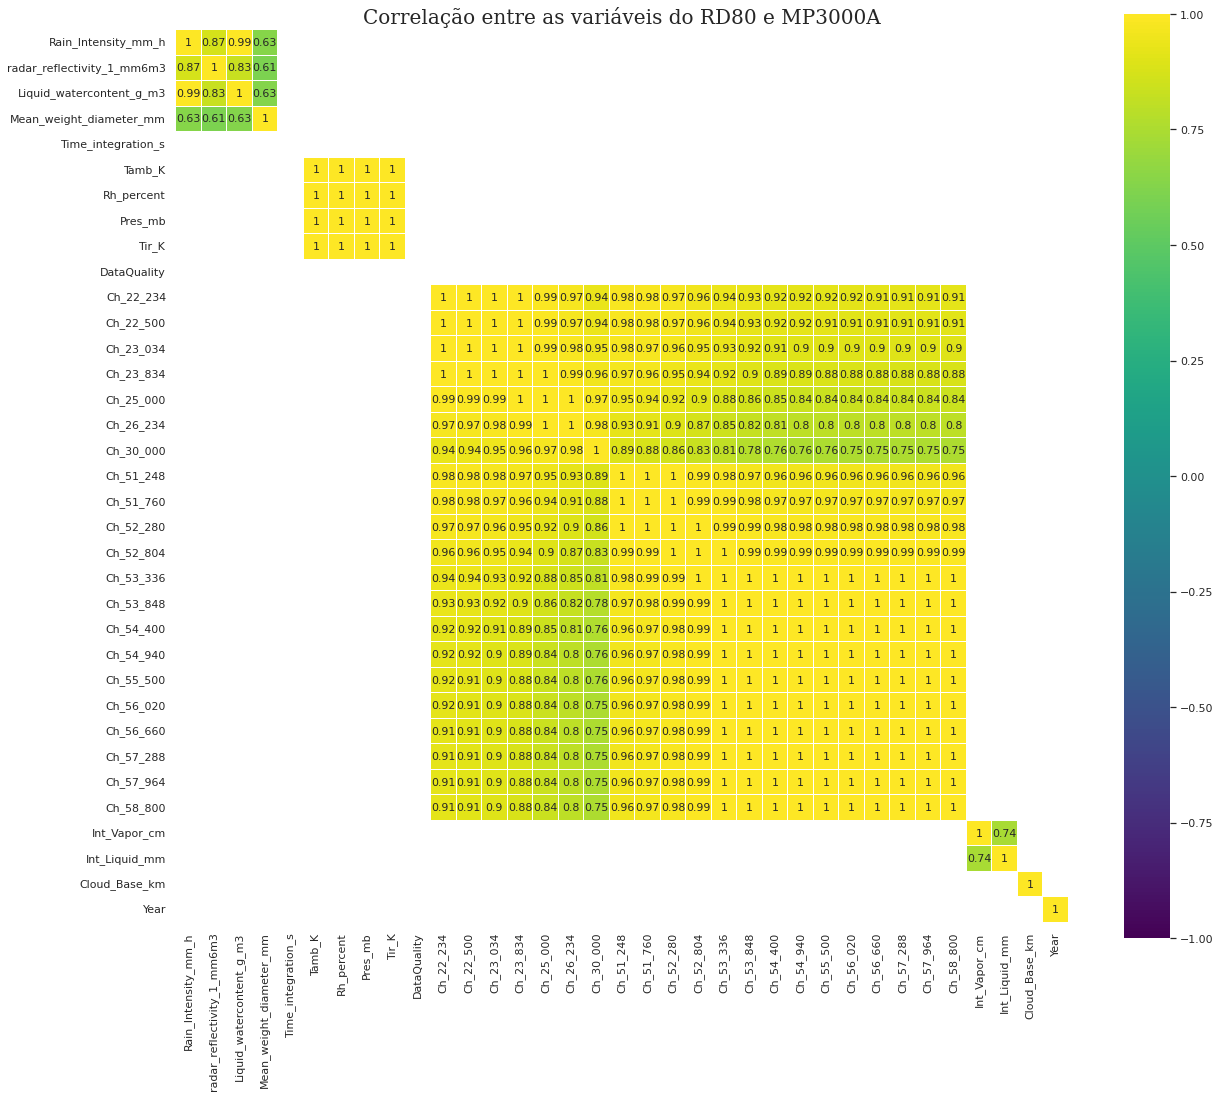

In [ ]:
corr = df_filter0_MP3000A_RD80.corr()
plt.figure(figsize=(20, 17))
plt.title('Correlação entre as variáveis do RD80 e MP3000A', fontsize=20, fontfamily='serif')
sns.heatmap(corr[(corr >= 0.50) | (corr <= -0.50)],cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 11}, square=True);

In [ ]:
'''def convert_k_c(info):
  temperatura = (info-273)
  return temperatura'''

#df_filter_MP3000A_RD80['Tamb_K'][df_MP3000A_RD80_final['Rain_Intensity_mm_h'] != 0] = (df_filter_MP3000A_RD80['Tamb_K']/100.)-273.15


'def convert_k_c(info):\n  temperatura = (info-273)\n  return temperatura'

Vamos visualizar o acumulado da intensidade da chuva para todo o período dos dados, olhando apenas os registros de chuva, usando como referência a variável Rain_Intensity_mm_h.

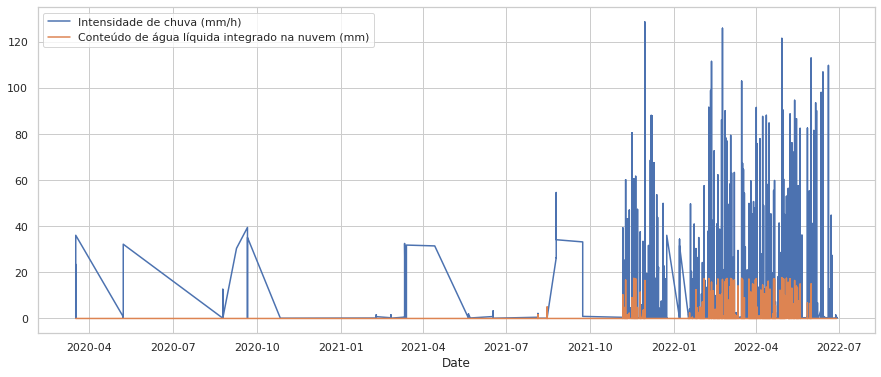

In [ ]:
#Plotando o acumulado da intensidade da chuva por horário do dia
df_filter1_MP3000A_RD80 = df_MP3000A_RD80_final.query("(Rain_Intensity_mm_h > 0)")

ax = plt.gca()
plt.rcParams["figure.figsize"] = [18,5]
df_filter1_MP3000A_RD80.plot(kind="line",x="Date",y="Rain_Intensity_mm_h",label='Intensidade de chuva (mm/h)', ax=ax)
df_filter1_MP3000A_RD80.plot(kind='line',x='Date',y="Int_Liquid_mm", label='Conteúdo de água líquida integrado na nuvem (mm)', ax=ax)

Vamos visualizar o acumulado da intensidade da chuva somente para o ano de **2022**.

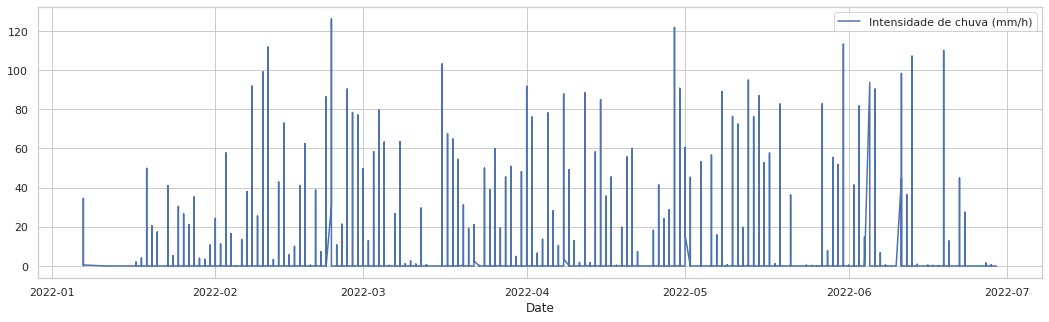

In [ ]:
#Plotando o acumulado da intensidade da chuva por horário do dia
df_filter1_MP3000A_RD80 = df_MP3000A_RD80_final.query("(Datetime >= '2022-01-1')")

ax = plt.gca()
plt.rcParams["figure.figsize"] = [15,6]
df_filter1_MP3000A_RD80.plot(kind="line",x="Date",y="Rain_Intensity_mm_h",label='Intensidade de chuva (mm/h)', ax=ax)

Agora vamos plotar a série temporal da intensidade das chuvas, separando os dados por períodos do dia: Night, Morning, Afternoon e Evening (Noite, Manhã, Tarde e Começo da noite).

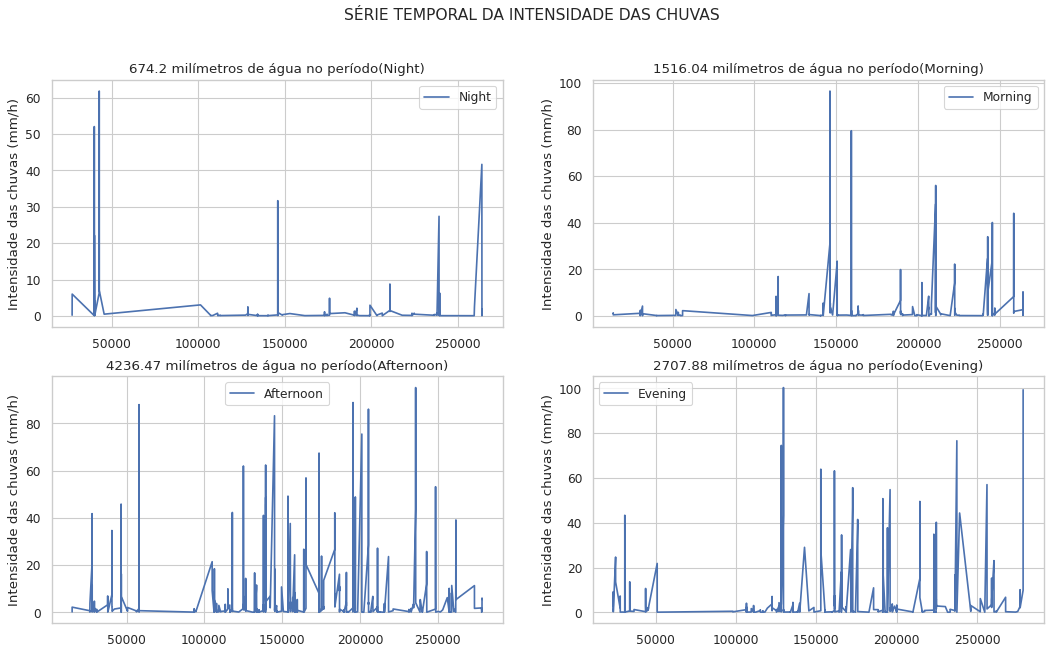

In [ ]:
labels=['Night','Morning','Afternoon','Evening']

figure(figsize=(16,9),dpi=80)
plt.suptitle('SÉRIE TEMPORAL DA INTENSIDADE DAS CHUVAS', size=14)
for res in range(0,4):
    tot = round(df_filter0_MP3000A_RD80.Rain_Intensity_mm_h.loc[df_filter0_MP3000A_RD80.session == labels[res]].sum(),2)
    plt.subplot(2,2,res+1)
    plt.title(str(tot)+' milímetros de água no período('+labels[res]+')')
    #plt.xlabel("")
    plt.ylabel("Intensidade das chuvas (mm/h)")
    plt.plot(df_filter0_MP3000A_RD80.loc[df_filter0_MP3000A_RD80.session == labels[res]]['Rain_Intensity_mm_h'], label=labels[res])
    plt.legend()
plt.show()

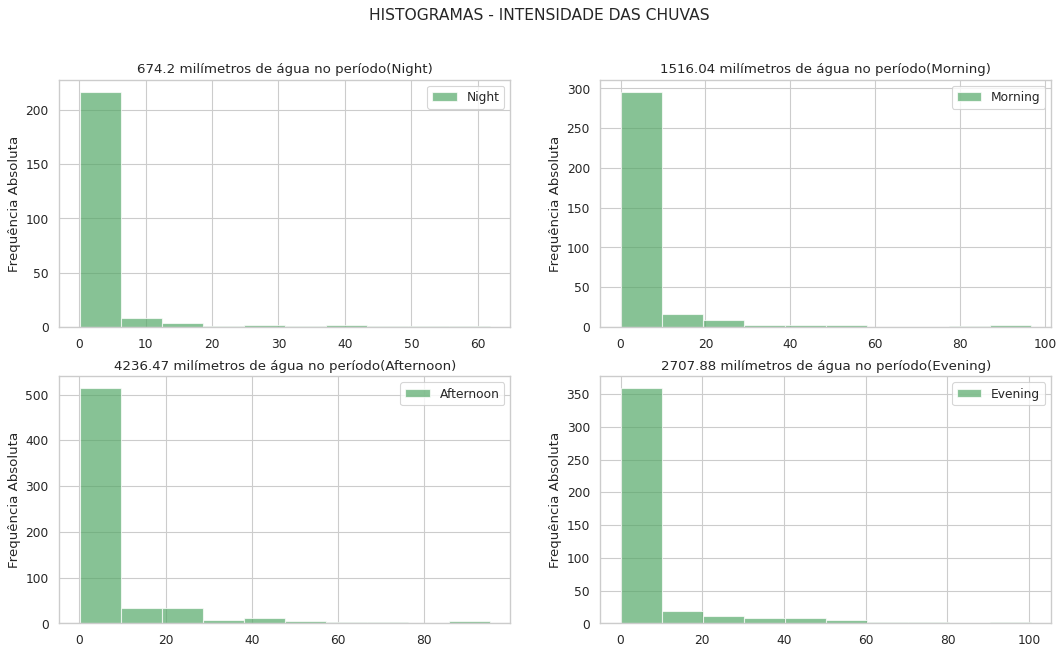

In [ ]:
labels=['Night','Morning','Afternoon','Evening']

figure(figsize=(16,9),dpi=80)
plt.suptitle('HISTOGRAMAS - INTENSIDADE DAS CHUVAS', size=14)
for res in range(0,4):
    tot = round(df_filter0_MP3000A_RD80.Rain_Intensity_mm_h.loc[df_filter0_MP3000A_RD80.session == labels[res]].sum(),2)
    plt.subplot(2,2,res+1)
    plt.title(str(tot)+' milímetros de água no período('+labels[res]+')')
    #plt.xlabel("")
    plt.ylabel("Frequência Absoluta")
    plt.hist(df_filter0_MP3000A_RD80.loc[df_filter0_MP3000A_RD80.session == labels[res]]['Rain_Intensity_mm_h'], label=labels[res], color='g', alpha=0.7 )
    plt.legend()
plt.show()

Como podemos ver, os resultados dos gráficos acima nos levam a inferir que ocorreu uma maior intensidade de chuva no período da **tarde (Afternoon)** durante todo o período observado, chegando a uma Frequência Absoluta de mais de 800.

Agora vamos visualizar este dado de forma separada, executando o código da célula abaixo.

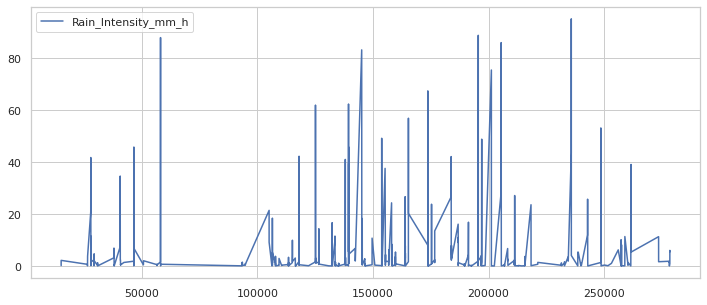

In [ ]:
#Plotando o acumulado da intensidade da chuva do período da tarde (Afternoon)

plt.figure(figsize=(12, 5))
df_filter0_MP3000A_RD80.loc[df_filter0_MP3000A_RD80.session == 'Afternoon']['Rain_Intensity_mm_h'].plot(legend=True)

# **Considerações**

Como vimos, o período do dia em que apresentou a maior intensidade de chuva (acúmulo total no período observado) foi no horário da tarde (Afternoon).

Em desenvolvimento...

# **References**

ROSE, T.; CREWELL, S.; LÖHNERT, U.; SIMMER, C. A network suitable microwave radiometer for operational monitoring of the cloudy atmosphere, Atmos. Res., 75, 183–200, 2005.

Tukey, John (1977). Exploratory Data Analysis. Addison-Wesley Publishing Company.

https://cienciadedadosuff.github.io/cursos/notebooks/caderno-3.html